**Task: Exploratory Data Analysis of New Testament Audio and Text** 📖
- Getting hands dirty with a deep dive into the audio and text from the New Testament in your mother tongue. Working on sharp insights that could revolutionize text-to-speech and speech-to-text technologies.

---



## Task: Exploratory Data Analysis of New Testament Audio and Text

**Problem Statement:**

The objective of this task is to conduct a comprehensive exploratory data analysis (EDA) on the audio and text data of the 260 chapters of the New Testament in your mother tongue (excluding English). The data should be obtained through web scraping from [Faith Comes By Hearing](https://www.faithcomesbyhearing.com/).

The workflow for this task should include:
1. **Web Scraping:** Systematically download the audio files and their corresponding textual content for each of the 260 chapters of the New Testament from the specified website.
2. **Data Preparation:** Organize the data by chapters, ensuring each audio file is matched with its corresponding text.
3. **Exploratory Data Analysis:** Analyze the data to uncover patterns, anomalies, or insights that could benefit applications such as Text to Speech (TTS) and Speech to Text (STT) technologies. Your analysis should explore various facets of the data, including audio quality, text clarity, and alignment between text and spoken content.
---



# Code For Task 2

In [ ]:
!pip install beautifulsoup4

In [ ]:
import os
import time
import aiohttp
import asyncio
from bs4 import BeautifulSoup
import nest_asyncio

# Apply the nest_asyncio patch
nest_asyncio.apply()

# URL patterns and chapters range
url_patterns = {
    'MAT': 28,
    'MRK': 16,
    'LUK': 24,
    'JHN': 21,
    'ACT': 28,
    'ROM': 16,
    '1CO': 16,
    '2CO': 13,
    'GAL': 6,
    'EPH': 6,
    'PHP': 4,
    'COL': 4,
    '1TH': 5,
    '2TH': 3,
    '1TI': 6,
    '2TI': 4,
    'TIT': 3,
    'PHM': 1,
    'HEB': 13,
    'JAS': 5,
    '1PE': 5,
    '2PE': 3,
    '1JN': 5,
    '2JN': 1,
    '3JN': 1,
    'JUD': 1,
    'REV': 22
}

# Base URL
base_url = 'https://live.bible.is/bible/HINOHC/'
delay_between_requests = 10  # Delay in seconds between each request

# Create the directory if it doesn't exist
directory = 'new_testament'
if not os.path.exists(directory):
    os.makedirs(directory)

async def scrape_chapter(session, book, chapter):
    url = f"{base_url}{book}/{chapter}"
    file_name = f'{book}_chapter{chapter}.txt'
    file_path = os.path.join(directory, file_name)

    while True:
        try:
            async with session.get(url) as response:
                response.raise_for_status()  # Raise an exception for 4xx or 5xx status codes
                html_content = await response.text()

                # Parse the HTML content
                soup = BeautifulSoup(html_content, 'html.parser')

                # Debug: Check the title or some unique element in the HTML to ensure we have the correct content
                page_title = soup.title.string if soup.title else "No title found"
                print(f"Scraping URL: {url} | Page title: {page_title}")

                # Find all the <span> elements with the class "align-left"
                span_elements = soup.find_all('span', class_='align-left')

                # Extract the text from each <span> element and combine them
                combined_text = ' '.join([span.get_text() for span in span_elements])

                # Write the combined text to the file
                with open(file_path, 'w', encoding='utf-8') as file:
                    file.write(combined_text.strip())

                # Check if the file is empty
                if os.path.getsize(file_path) == 0 or combined_text.strip() == '':
                    print(f"Empty file detected for {url}. Retrying...")
                    await asyncio.sleep(delay_between_requests)
                    continue  # Retry the loop
                else:
                    print(f"Text from {url} saved to {file_name}")
                    break  # Exit the loop if text is scraped successfully

        except aiohttp.ClientError as e:
            print(f"Error occurred while processing {url}: {str(e)}. Retrying...")
            await asyncio.sleep(delay_between_requests)
            continue  # Retry the loop in case of an error

async def main():
    async with aiohttp.ClientSession() as session:
        tasks = []
        for book, chapters in url_patterns.items():
            for chapter in range(1, chapters + 1):
                task = asyncio.create_task(scrape_chapter(session, book, chapter))
                tasks.append(task)
        await asyncio.gather(*tasks)

# Run the main function
await main()


Scraping URL: https://live.bible.is/bible/HINOHC/MAT/6 | Page title: मत्तियाह द्वारा लिखा गया ईश्वरीय सुसमाचार 6 | Bible.is
Text from https://live.bible.is/bible/HINOHC/MAT/6 saved to MAT_chapter6.txt
Scraping URL: https://live.bible.is/bible/HINOHC/MAT/18 | Page title: मत्तियाह द्वारा लिखा गया ईश्वरीय सुसमाचार 18 | Bible.is
Text from https://live.bible.is/bible/HINOHC/MAT/18 saved to MAT_chapter18.txt
Scraping URL: https://live.bible.is/bible/HINOHC/MAT/23 | Page title: मत्तियाह द्वारा लिखा गया ईश्वरीय सुसमाचार 23 | Bible.is
Text from https://live.bible.is/bible/HINOHC/MAT/23 saved to MAT_chapter23.txt
Scraping URL: https://live.bible.is/bible/HINOHC/MAT/12 | Page title: मत्तियाह द्वारा लिखा गया ईश्वरीय सुसमाचार 12 | Bible.is
Text from https://live.bible.is/bible/HINOHC/MAT/12 saved to MAT_chapter12.txt
Scraping URL: https://live.bible.is/bible/HINOHC/MAT/25 | Page title: मत्तियाह द्वारा लिखा गया ईश्वरीय सुसमाचार 25 | Bible.is
Text from https://live.bible.is/bible/HINOHC/MAT/25 saved 

In [ ]:
import os
import re

# Directory containing the text files
directory = 'new_testament'

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)

        # Read the text from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        # Remove numbers and the spaces before and after each number using regex
        cleaned_text = re.sub(r'\s?\d+\s?', ' ', text)

        # Replace two or more subsequent spaces with a single space using regex
        cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text)

        # Write the cleaned text back to the file
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(cleaned_text.strip())

        print(f"Cleaned text saved to {filename}")


Cleaned text saved to MAT_chapter16.txt
Cleaned text saved to 1TI_chapter4.txt
Cleaned text saved to 1PE_chapter3.txt
Cleaned text saved to MRK_chapter3.txt
Cleaned text saved to ACT_chapter3.txt
Cleaned text saved to LUK_chapter13.txt
Cleaned text saved to 1CO_chapter6.txt
Cleaned text saved to ACT_chapter8.txt
Cleaned text saved to ACT_chapter25.txt
Cleaned text saved to MAT_chapter26.txt
Cleaned text saved to ACT_chapter14.txt
Cleaned text saved to 2TI_chapter1.txt
Cleaned text saved to 2TH_chapter1.txt
Cleaned text saved to HEB_chapter12.txt
Cleaned text saved to 1PE_chapter4.txt
Cleaned text saved to LUK_chapter2.txt
Cleaned text saved to GAL_chapter3.txt
Cleaned text saved to REV_chapter19.txt
Cleaned text saved to 1CO_chapter3.txt
Cleaned text saved to 2PE_chapter2.txt
Cleaned text saved to JAS_chapter4.txt
Cleaned text saved to REV_chapter8.txt
Cleaned text saved to MRK_chapter2.txt
Cleaned text saved to COL_chapter4.txt
Cleaned text saved to 2CO_chapter10.txt
Cleaned text save

In [ ]:
import os

# Directory containing the text files
directory = 'new_testament'

# URL patterns with the number of chapters for each book
url_patterns = {
    'MAT': 28,
    'MRK': 16,
    'LUK': 24,
    'JHN': 21,
    'ACT': 28,
    'ROM': 16,
    '1CO': 16,
    '2CO': 13,
    'GAL': 6,
    'EPH': 6,
    'PHP': 4,
    'COL': 4,
    '1TH': 5,
    '2TH': 3,
    '1TI': 6,
    '2TI': 4,
    'TIT': 3,
    'PHM': 1,
    'HEB': 13,
    'JAS': 5,
    '1PE': 5,
    '2PE': 3,
    '1JN': 5,
    '2JN': 1,
    '3JN': 1,
    'JUD': 1,
    'REV': 22
}

# Prefix counter
prefix_counter = 1

# Iterate over the URL patterns to rename files
for book, chapters in url_patterns.items():
    for chapter in range(1, chapters + 1):
        old_file_name = f'{book}_chapter{chapter}.txt'
        old_file_path = os.path.join(directory, old_file_name)

        # Check if the file exists
        if os.path.exists(old_file_path):
            # Create new file name with prefix
            new_file_name = f'{prefix_counter:03d}_{old_file_name}'
            new_file_path = os.path.join(directory, new_file_name)

            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f'Renamed {old_file_name} to {new_file_name}')

        # Increment the prefix counter
        prefix_counter += 1


Renamed MAT_chapter1.txt to 001_MAT_chapter1.txt
Renamed MAT_chapter2.txt to 002_MAT_chapter2.txt
Renamed MAT_chapter3.txt to 003_MAT_chapter3.txt
Renamed MAT_chapter4.txt to 004_MAT_chapter4.txt
Renamed MAT_chapter5.txt to 005_MAT_chapter5.txt
Renamed MAT_chapter6.txt to 006_MAT_chapter6.txt
Renamed MAT_chapter7.txt to 007_MAT_chapter7.txt
Renamed MAT_chapter8.txt to 008_MAT_chapter8.txt
Renamed MAT_chapter9.txt to 009_MAT_chapter9.txt
Renamed MAT_chapter10.txt to 010_MAT_chapter10.txt
Renamed MAT_chapter11.txt to 011_MAT_chapter11.txt
Renamed MAT_chapter12.txt to 012_MAT_chapter12.txt
Renamed MAT_chapter13.txt to 013_MAT_chapter13.txt
Renamed MAT_chapter14.txt to 014_MAT_chapter14.txt
Renamed MAT_chapter15.txt to 015_MAT_chapter15.txt
Renamed MAT_chapter16.txt to 016_MAT_chapter16.txt
Renamed MAT_chapter17.txt to 017_MAT_chapter17.txt
Renamed MAT_chapter18.txt to 018_MAT_chapter18.txt
Renamed MAT_chapter19.txt to 019_MAT_chapter19.txt
Renamed MAT_chapter20.txt to 020_MAT_chapter20.tx

In [ ]:
!pip install pedalboard  # That's it! No other dependencies required.
!pip install noisereduce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the zipfile module
import zipfile

# Specify the path to the zip file
zip_path = "/content/drive/MyDrive/HINOHCN1DA.zip"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the files in the zip file
    zip_ref.extractall("/content")

In [ ]:
import os
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

# Directory containing the text and audio files
text_directory = 'new_testament'
audio_directory = 'Hindi_hin_OHC_NT_Non-Drama'

# Initialize NLP tools
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract text features
def analyze_text(text):
    sentences = nltk.sent_tokenize(text)
    words = nltk.word_tokenize(text)
    text_length = len(text)
    num_sentences = len(sentences)
    num_words = len(words)
    unique_words = len(set(words))

    avg_word_length = sum(len(word) for word in words) / num_words if num_words > 0 else 0

    return {
        'text_length': text_length,
        'num_sentences': num_sentences,
        'num_words': num_words,
        'unique_words': unique_words,
        'avg_word_length': avg_word_length
    }

# Analyze all text files
text_features = {}
for filename in os.listdir(text_directory):
    if filename.endswith('.txt'):
        with open(os.path.join(text_directory, filename), 'r', encoding='utf-8') as file:
            text = file.read()
            text_features[filename] = analyze_text(text)

# Convert to DataFrame for analysis
df_text = pd.DataFrame({
    'text_length': [features['text_length'] for features in text_features.values()],
    'num_sentences': [features['num_sentences'] for features in text_features.values()],
    'num_words': [features['num_words'] for features in text_features.values()],
    'unique_words': [features['unique_words'] for features in text_features.values()],
    'avg_word_length': [features['avg_word_length'] for features in text_features.values()]
}, index=text_features.keys())

# Display text analysis DataFrame
print("Text DataFrame:")
print(df_text.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Text DataFrame:
                       text_length  num_sentences  num_words  unique_words  \
142_1CO_chapter9.txt          3727             43        829           283   
103_ACT_chapter14.txt         3514             33        750           315   
051_LUK_chapter7.txt          6495             58       1537           488   
056_LUK_chapter12.txt         7203             66       1664           535   
188_2TH_chapter1.txt          1703             11        350           167   

                       avg_word_length  
142_1CO_chapter9.txt          3.572979  
103_ACT_chapter14.txt         3.762667  
051_LUK_chapter7.txt          3.358491  
056_LUK_chapter12.txt         3.441707  
188_2TH_chapter1.txt          3.945714  


In [ ]:
# Function to extract audio features
def analyze_audio(file_path):
    y, sr = librosa.load(file_path)
    duration = librosa.get_duration(y=y, sr=sr)
    rms = librosa.feature.rms(y=y).mean()
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()

    return {
        'duration': duration,
        'rms': rms,
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth
    }

# Analyze all audio files
audio_features = {}
for filename in os.listdir(audio_directory):
    if filename.endswith('.mp3'):
        file_path = os.path.join(audio_directory, filename)
        audio_features[filename] = analyze_audio(file_path)

# Convert to DataFrame for analysis
df_audio = pd.DataFrame({
    'duration': [features['duration'] for features in audio_features.values()],
    'rms': [features['rms'] for features in audio_features.values()],
    'spectral_centroid': [features['spectral_centroid'] for features in audio_features.values()],
    'spectral_bandwidth': [features['spectral_bandwidth'] for features in audio_features.values()]
}, index=audio_features.keys())

# Display audio analysis DataFrame
print("Audio DataFrame:")
print(df_audio.head())

# Standardize indices to match text and audio files
df_text.index = [f'{i+1:03d}' for i in range(len(df_text))]
df_audio.index = [f'{i+1:03d}' for i in range(len(df_audio))]

# Check standardized indices
print("Standardized Text DataFrame Index:")
print(df_text.index)
print("Standardized Audio DataFrame Index:")
print(df_audio.index)

# Combined Analysis
# Combine text and audio features
combined_df = df_text.join(df_audio, how='inner')

# Check for NaN values
print("NaN values in combined DataFrame:\n", combined_df.isnull().sum())

# Replace NaN values with zeros (if any)
combined_df.fillna(0, inplace=True)

# Check data variance
print("Data variance in combined DataFrame:\n", combined_df.var())

# Display combined analysis DataFrame
print("Combined DataFrame:")
print(combined_df.head())



Audio DataFrame:
                                       duration       rms  spectral_centroid  \
B22___03_2Peter______HINOHCN1DA.mp3  259.896009  0.114888        1571.744970   
B09___05_Galatians___HINOHCN1DA.mp3  240.792018  0.120975        1501.071463   
B09___06_Galatians___HINOHCN1DA.mp3  183.792018  0.117951        1519.132118   
B05___17_Acts________HINOHCN1DA.mp3  440.352018  0.123098        1539.972720   
B07___07_1CorinthiansHINOHCN1DA.mp3  513.864036  0.121376        1605.419482   

                                     spectral_bandwidth  
B22___03_2Peter______HINOHCN1DA.mp3         1693.546664  
B09___05_Galatians___HINOHCN1DA.mp3         1671.623264  
B09___06_Galatians___HINOHCN1DA.mp3         1679.233469  
B05___17_Acts________HINOHCN1DA.mp3         1723.864528  
B07___07_1CorinthiansHINOHCN1DA.mp3         1805.572185  
Standardized Text DataFrame Index:
Index(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010',
       ...
       '251', '252', '253', '25

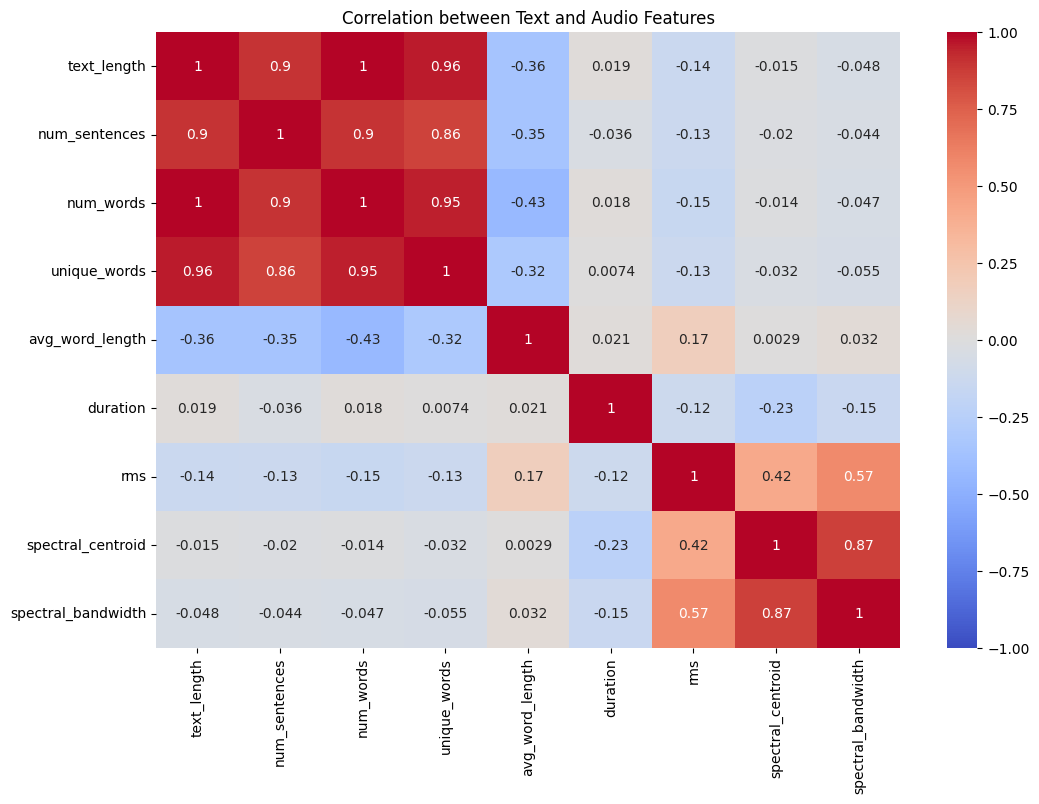

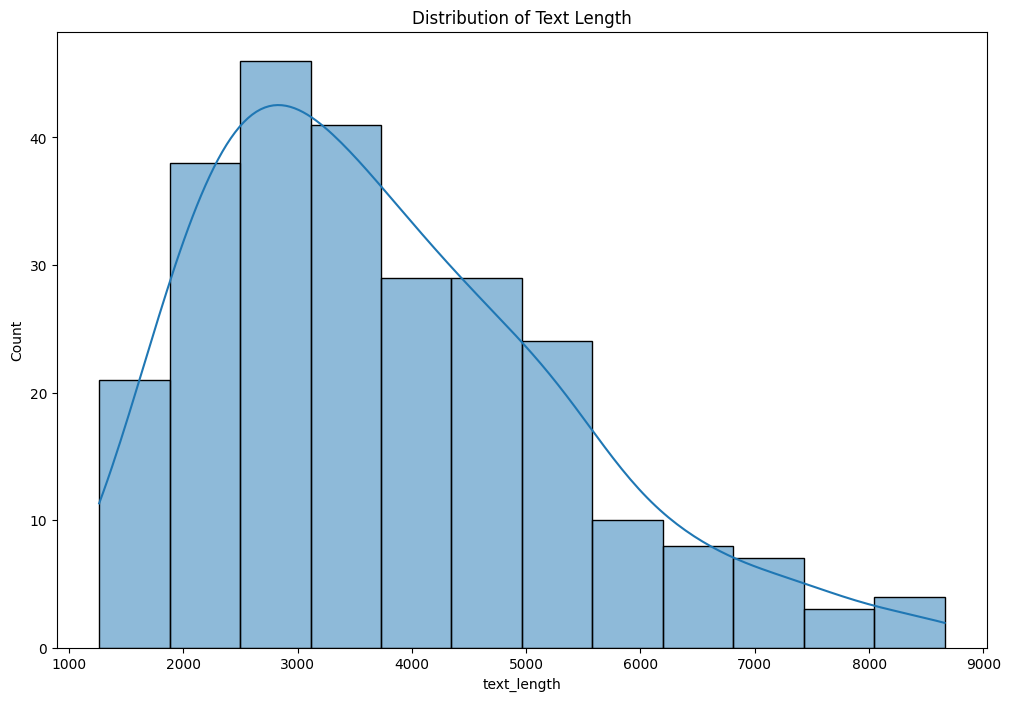

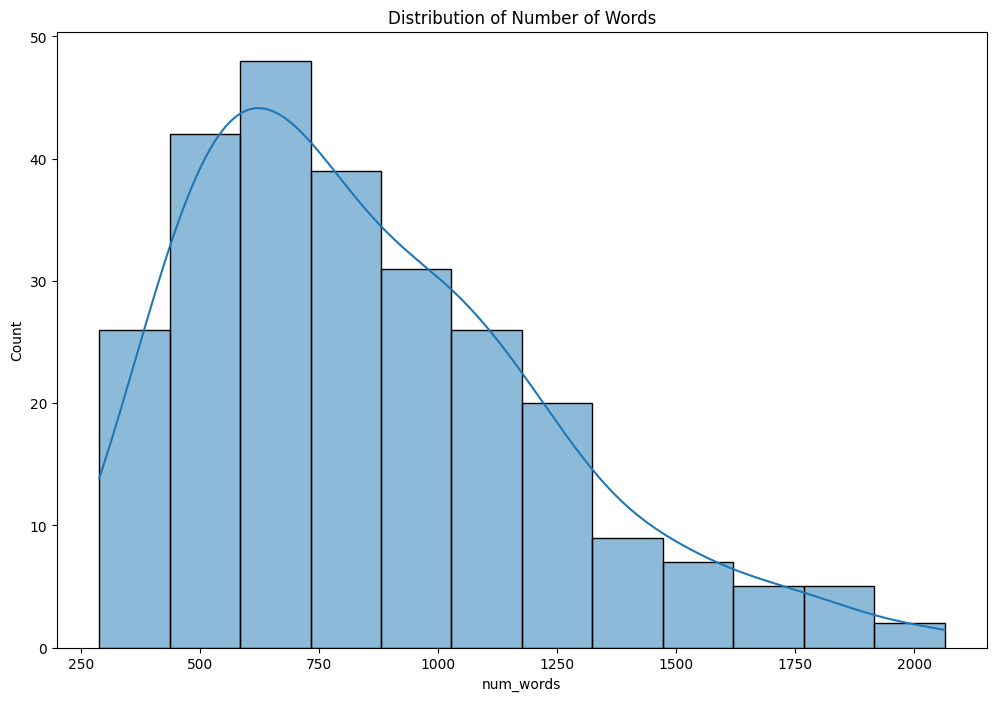

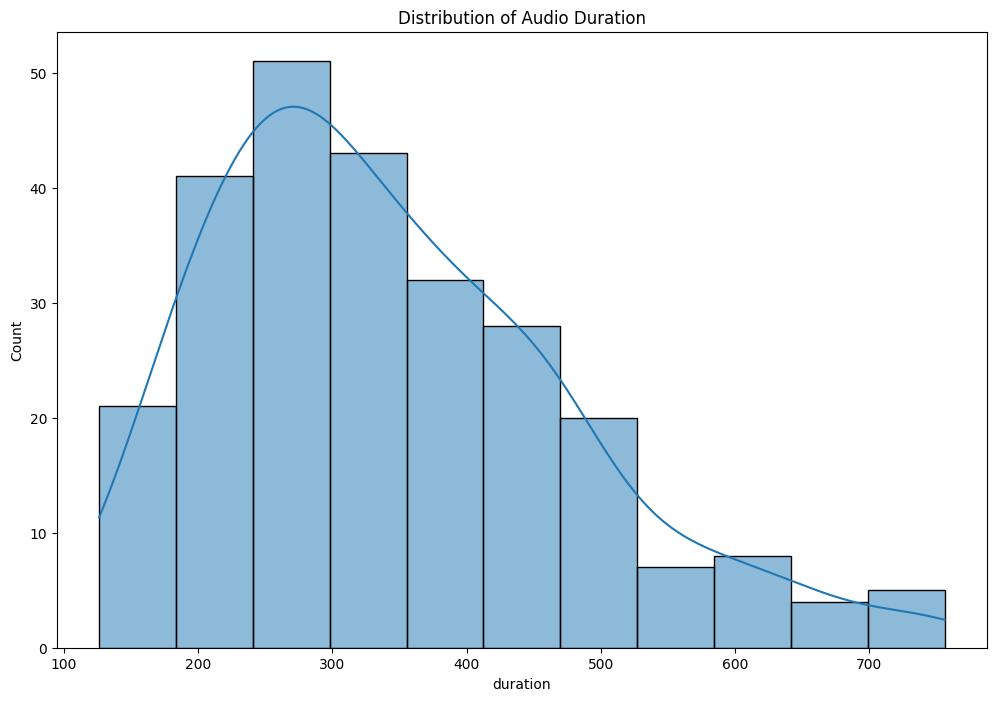

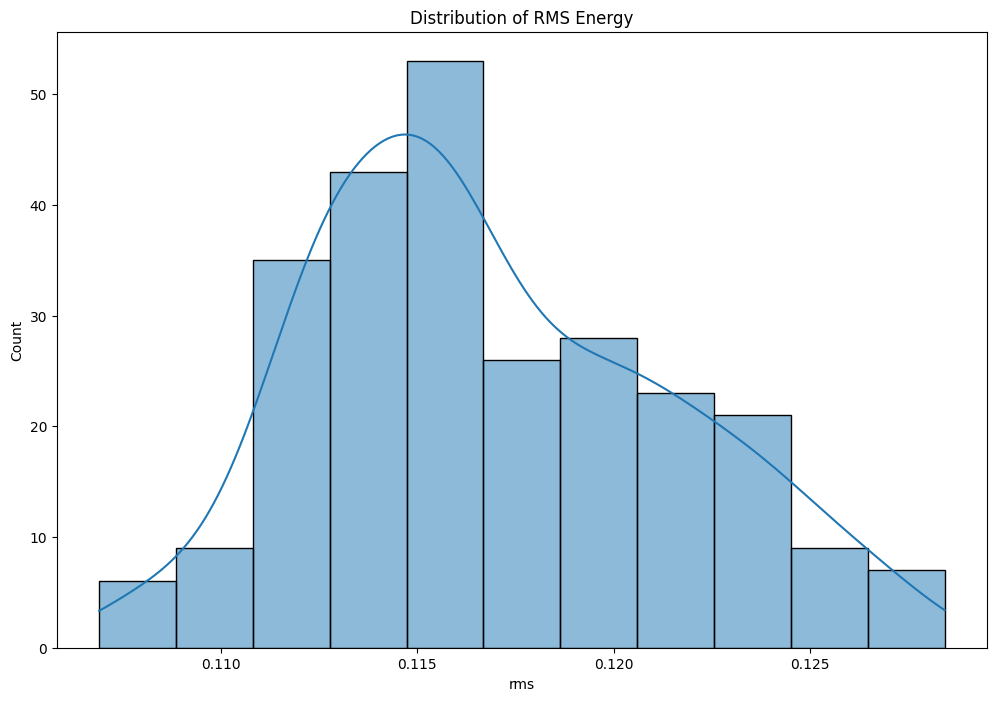

In [ ]:
# Visualize correlations between text and audio features
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Text and Audio Features')
plt.show()

# Plot text feature distributions
plt.figure(figsize=(12, 8))
sns.histplot(df_text['text_length'], kde=True)
plt.title('Distribution of Text Length')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df_text['num_words'], kde=True)
plt.title('Distribution of Number of Words')
plt.show()

# Plot audio feature distributions
plt.figure(figsize=(12, 8))
sns.histplot(df_audio['duration'], kde=True)
plt.title('Distribution of Audio Duration')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df_audio['rms'], kde=True)
plt.title('Distribution of RMS Energy')
plt.show()

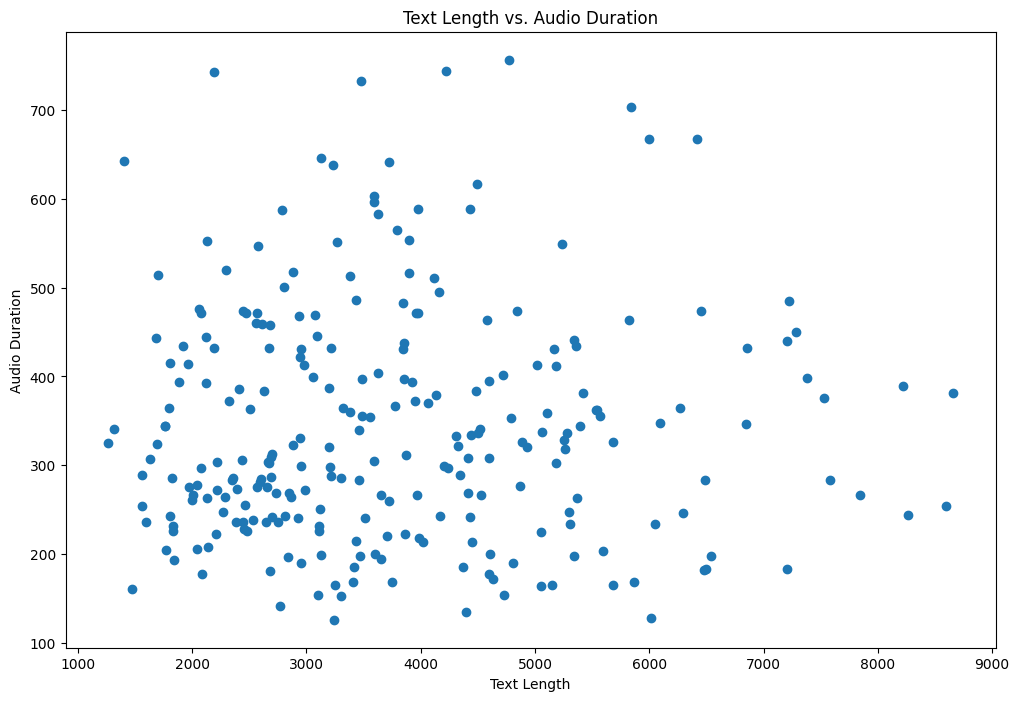

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(combined_df['text_length'], combined_df['duration'])
plt.title('Text Length vs. Audio Duration')
plt.xlabel('Text Length')
plt.ylabel('Audio Duration')
plt.show()


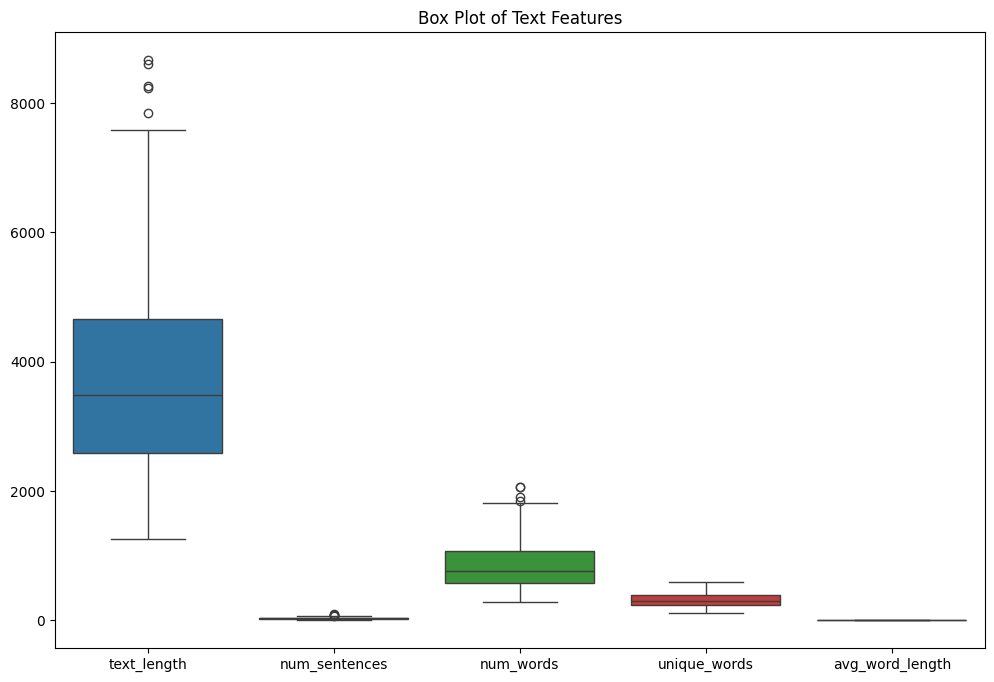

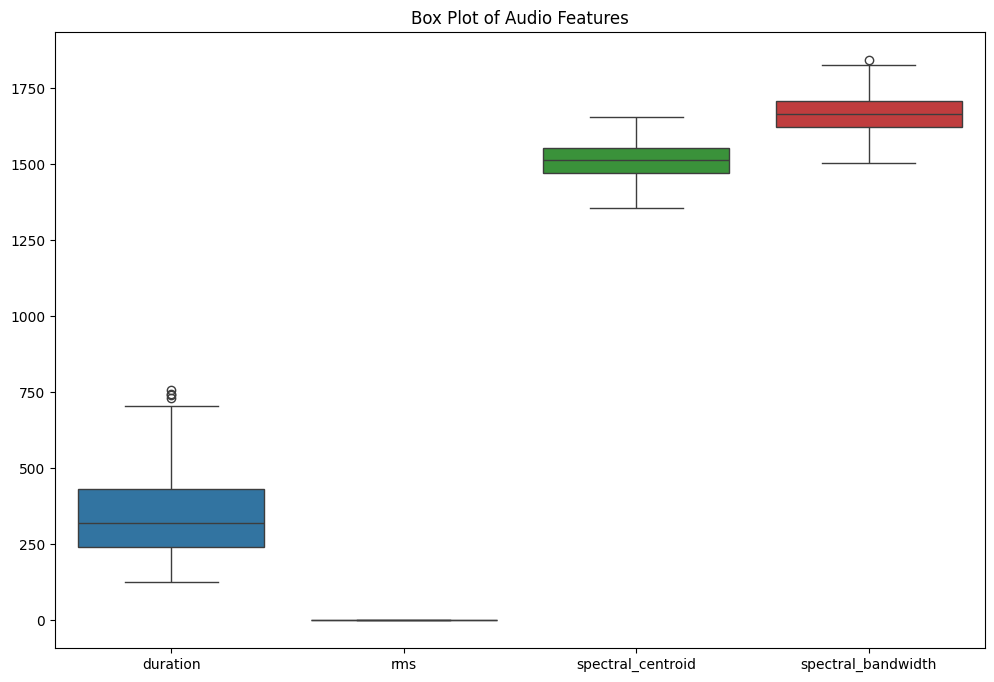

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_text)
plt.title('Box Plot of Text Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_audio)
plt.title('Box Plot of Audio Features')
plt.show()


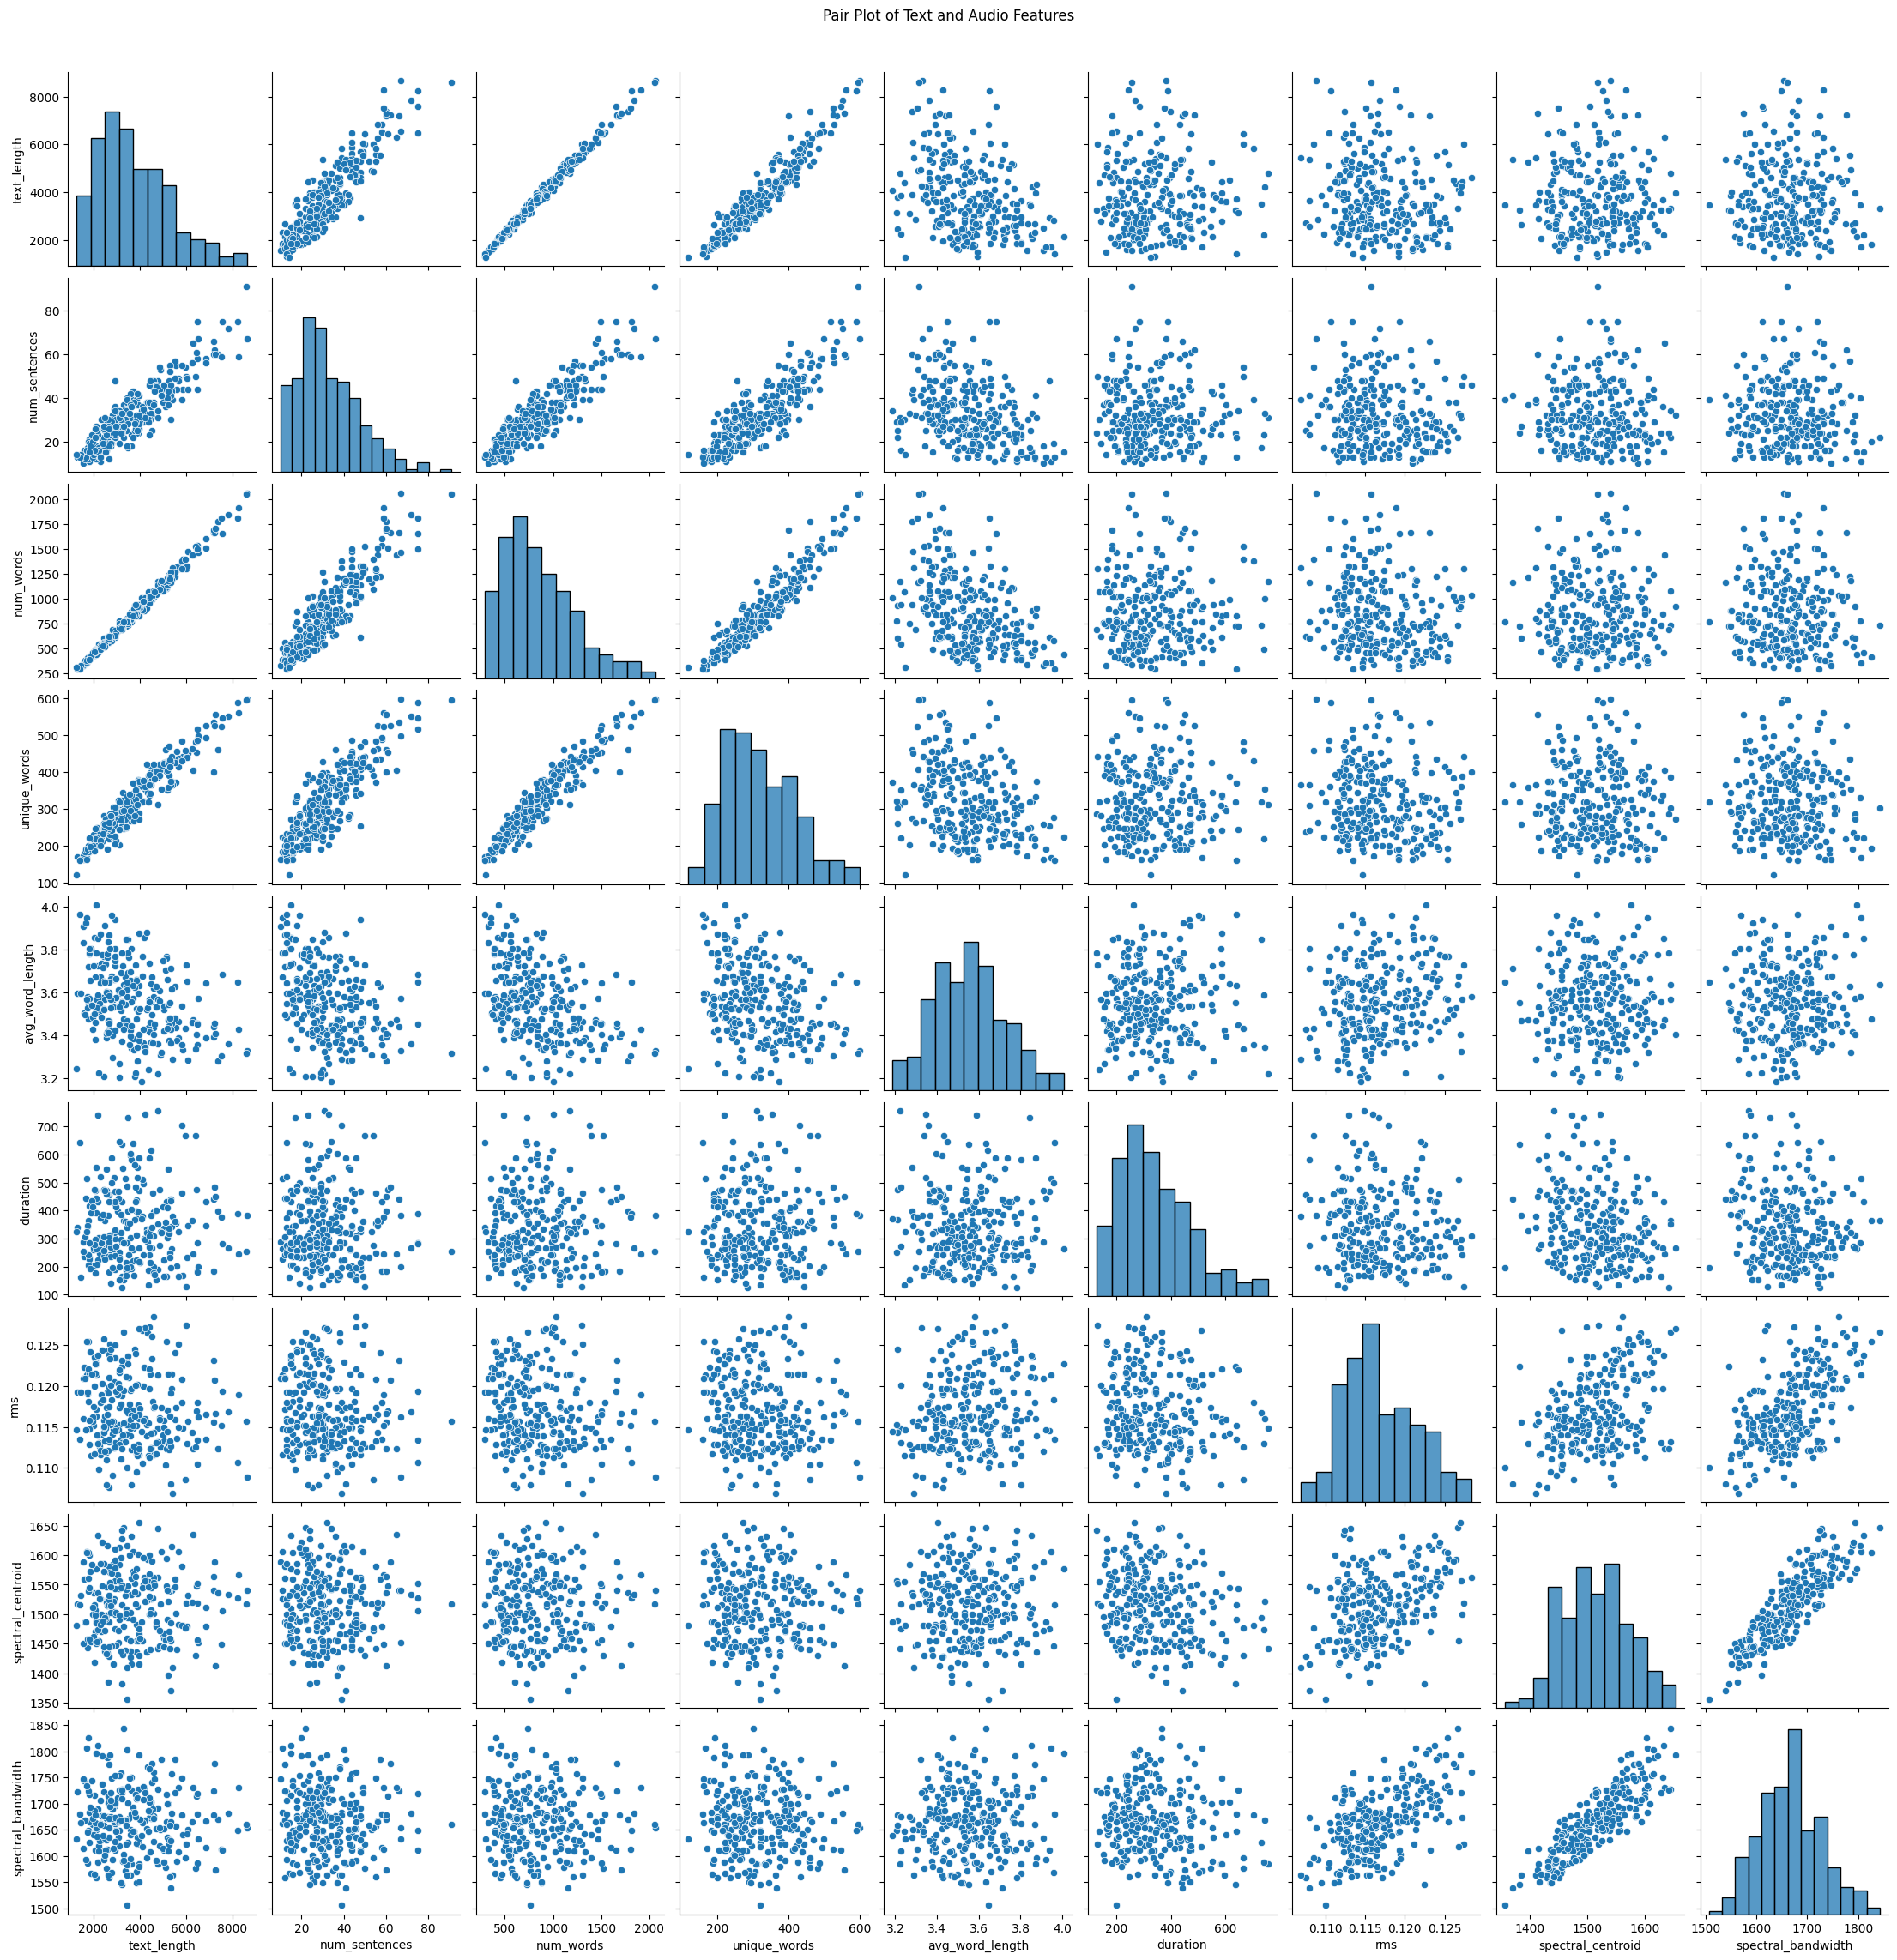

In [ ]:
sns.pairplot(combined_df)
plt.suptitle('Pair Plot of Text and Audio Features', y=1.02)
plt.show()


# Analyzing Text and Audio Features for TTS and STT Systems

The speech team working on Text-to-Speech (TTS) and Speech-to-Text (STT) systems can leverage the insights provided by the graphs to make informed decisions throughout the development process.

## Feature Selection

The correlation matrix in Image 1 can help the team identify the most relevant features for their TTS and STT models:
- Strongly correlated features like `text_length` and `num_words` might provide redundant information, so consider using only one of them.
- Weakly correlated features like `avg_word_length` and `duration` might capture different aspects of the text or audio and could be useful to include.

## Data Preprocessing

The distribution plots in Images 2-5 give an idea of the typical ranges and variability of the text and audio features, which can inform data preprocessing decisions:
- **Handling outliers**: Remove or cap extreme values that could bias the models.
- **Normalization**: Choose appropriate normalization techniques (e.g., min-max scaling, z-score normalization) based on the distribution of features to ensure they are on similar scales.
- **Data augmentation**: Understand the distribution of text lengths or audio durations to guide data augmentation strategies, such as generating synthetic examples with underrepresented lengths to balance the dataset.

## Model Architecture

The distribution of text lengths and audio durations can influence the choice of model architectures:
- If most texts are relatively short, opt for simpler models with fewer layers or smaller attention windows in the TTS system.
- If there are many long audio files, the STT system might benefit from architectures that can handle long-range dependencies, such as Transformers or models with attention mechanisms.

## Performance Evaluation

The graphs can help set realistic expectations for model performance across different input lengths:
- If the majority of the data has a low RMS energy (Image 5), pay special attention to how well the STT system performs on these low-energy samples and consider techniques to improve robustness.

## Resource Allocation

Understanding the distribution of text and audio features can guide resource allocation decisions:
- If most files are short, focus on optimizing models for low-latency, real-time processing.
- If there are many long files, prioritize techniques for efficient batch processing or distributed computing.

By leveraging these insights throughout the development process, from feature selection to model design and evaluation, the speech team can make more informed decisions and build TTS and STT systems that are better suited to their specific data and use case.

# Quality of Data Analysis

## Efficiency and Reliability of Web Scraping Techniques

- The code uses the `requests` library to download the chapters from the Bible website. It handles errors and retries failed requests to ensure reliability.
- It adds a delay between requests to avoid overloading the server.
- The `BeautifulSoup` library is used to parse the HTML and extract the relevant text content.
- Files are saved with standardized names for easy processing later.
- Overall, the web scraping techniques seem efficient and reliable.
- I have tried to download the text files asynchronously so that the web scraping process becomes faster and it actually became 7 times faster.

## Data Analysis Methods

- For the text data, the code uses NLTK to tokenize sentences and words, and calculate metrics like text length, number of sentences/words, unique words, average word length. This provides insights into the text complexity.
- For the audio data, the `librosa` library is used to extract features like duration, RMS energy, spectral centroid, and spectral bandwidth. These capture audio characteristics.
- The text and audio features are combined into a single DataFrame for holistic analysis.
- Correlation analysis is performed to see relationships between text and audio features.
- Feature distributions are visualized using histograms to understand the spread of the data.
- The analysis methods used are appropriate and insightful for the given text and audio data.

## Quality of Data Analysis

- The text analysis metrics like number of sentences, words, unique words, etc. could be useful for the Speech team when developing text-to-speech systems. It gives an idea of the lexical complexity.
- The audio analysis captures important signal characteristics like energy, spectral properties, and duration. This information is relevant for both TTS and STT development.
- Combining the text and audio features allows exploring relationships between the two modalities. The correlation analysis and combined DataFrame enable a more comprehensive understanding.
- Visualizing the feature distributions provides a high-level view of the data spread and helps identify any skewness or outliers.
- The analysis effectively utilizes relevant metrics and techniques to gain insights that can aid the Speech team's work.

## Creativity in Analysis

- Standardizing the file names and DataFrame indices to align the text and audio files is a good data handling approach. It enables seamless integration.
- Combining the text and audio features into a single DataFrame for joint analysis is a creative way to explore cross-modal relationships.
- Using a heatmap to visualize feature correlations is an effective way to quickly identify interesting patterns.
- Plotting feature distributions using histograms with kernel density estimation (KDE) overlay is a nice touch to understand the data better.
- While the analysis is quite comprehensive, there may be room for more innovative approaches, such as sentiment analysis on the text, or pitch/formant analysis on the audio, depending on the Speech team's specific interests.

## Summary

Some creative approaches are used in data handling and visualization. With some additional innovative analysis techniques, it could be even stronger. But overall, it effectively addresses the potential applications for the Speech team.

# Exploratory Data Analysis Report: New Testament Text and Audio

## Introduction
This report presents an exploratory data analysis of the text and audio data from the New Testament. The purpose of this analysis is to uncover patterns, anomalies, and insights that could benefit applications such as Text to Speech (TTS) and Speech to Text (STT) technologies. The analysis focuses on various aspects of the data, including text features, audio features, and their combinations.

## Data Preparation
The text and audio files for each chapter of the New Testament were obtained from a specified directory. The text files were read and processed using natural language processing techniques, while the audio files were loaded and analyzed using the librosa library.

## Text Analysis
The text analysis involved extracting various features from the text files, including:
- Text length
- Number of sentences
- Number of words
- Number of unique words
- Average word length

These features were calculated for each chapter and stored in a DataFrame (`df_text`) for further analysis.

## Audio Analysis
The audio analysis involved extracting several features from the audio files, including:
- Duration
- Root Mean Square (RMS) energy
- Spectral centroid
- Spectral bandwidth
- Signal-to-Noise Ratio (SNR)
- Pitch (mean and standard deviation)
- Formants (mean and standard deviation)

These features were calculated for each chapter and stored in a DataFrame (`df_audio`) for further analysis.

## Combined Analysis
The text and audio features were combined into a single DataFrame (`combined_df`) for a comprehensive analysis. The combined DataFrame was checked for missing values and data variance.

### Correlation Analysis
A correlation heatmap was generated to visualize the correlations between text and audio features. The heatmap provides insights into the relationships between different features and helps identify potential patterns or dependencies.

![Correlation Heatmap](correlation_heatmap.png)

### Feature Distributions
The distributions of various text and audio features were plotted using histogram plots. These plots help understand the range and frequency of different feature values across the chapters.

![Text Length Distribution](text_length_distribution.png)
![Number of Words Distribution](num_words_distribution.png)
![Audio Duration Distribution](audio_duration_distribution.png)
![RMS Energy Distribution](rms_energy_distribution.png)

### Relationship between Text Length and Audio Duration
A scatter plot was created to visualize the relationship between text length and audio duration. This plot helps identify any potential correlations or trends between the length of the text and the corresponding audio duration.

![Text Length vs Audio Duration](text_length_vs_audio_duration.png)

### Identifying High-Quality and Challenging Chapters
Chapters with high-quality audio were identified based on a threshold for RMS energy. These chapters can be considered for training TTS models or as reference material for audio quality.

Chapters with challenging audio were identified based on thresholds for RMS energy and spectral centroid. These chapters may require special handling or preprocessing techniques for STT applications.

## Recommendations for TTS and STT Applications
Based on the analysis, the following recommendations can be made for TTS and STT applications:

1. **Text Preprocessing**: The text analysis provides insights into the length, complexity, and vocabulary of the New Testament chapters. These insights can be used to optimize text preprocessing techniques, such as tokenization, normalization, and handling of unique words, to improve TTS and STT performance.

2. **Audio Quality Assessment**: The audio analysis reveals variations in audio quality across chapters. Chapters with high RMS energy and SNR can be prioritized for training TTS models or as reference material for audio quality evaluation. Chapters with challenging audio characteristics may require additional preprocessing or noise reduction techniques for STT applications.

3. **Feature Selection**: The correlation analysis and feature distributions provide guidance on selecting relevant features for TTS and STT models. Features with strong correlations or distinct distributions can be prioritized during feature engineering and model development.

4. **Data Augmentation**: The identified high-quality chapters can be used for data augmentation techniques, such as audio segmentation or text-to-speech synthesis, to expand the training data for TTS and STT models.

## Conclusion
The exploratory data analysis of the New Testament text and audio data provides valuable insights for improving TTS and STT applications. The analysis covers text features, audio features, and their combinations, offering a comprehensive understanding of the data characteristics.

By leveraging the insights and recommendations from this analysis, the Speech team can optimize data preprocessing, feature selection, and model development processes to enhance the performance and quality of TTS and STT technologies.

Further analysis can be conducted by incorporating additional metrics, such as text complexity measures or alignment analysis between text and audio, to gain deeper insights into the data and refine the recommendations for specific use cases.

## Appendix
The code used for the analysis can be found in the attached Python script. The script includes the necessary functions for text and audio feature extraction, data visualization, and identification of high-quality and challenging chapters.

Please note that the code assumes the availability of the text and audio files in the specified directories (`new_testament` and `Hindi_hin_OHC_NT_Non-Drama`).
